In [59]:
import pandas as pd

In [60]:
df = pd.read_csv(r'ai_job.csv')

In [61]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [62]:
df.shape
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [63]:
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [64]:
df['job_title'].value_counts()


job_title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
Principal Data Scientist       734
AI Specialist                  728
ML Ops Engineer                725
Computer Vision Engineer       724
Data Scientist                 720
Deep Learning Engineer         718
AI Consultant                  704
Name: count, dtype: int64

In [65]:
df['employment_type'].value_counts(normalize=True)

employment_type
FT    0.254133
FL    0.250533
CT    0.248067
PT    0.247267
Name: proportion, dtype: float64

In [66]:
df['experience_level'].value_counts(normalize=True)

experience_level
MI    0.252067
EX    0.250667
SE    0.249400
EN    0.247867
Name: proportion, dtype: float64

In [67]:
df['salary_usd'].describe()

count     15000.000000
mean     115348.965133
std       60260.940438
min       32519.000000
25%       70179.750000
50%       99705.000000
75%      146408.500000
max      399095.000000
Name: salary_usd, dtype: float64

In [68]:
df.groupby('experience_level')['salary_usd'].mean()

experience_level
EN     63133.377084
EX    187723.647340
MI     87955.471833
SE    122187.657845
Name: salary_usd, dtype: float64

In [69]:
df.groupby('company_location')['job_title'].count().sort_values(ascending=False)

company_location
Germany           814
Denmark           778
Canada            769
France            769
Austria           765
Singapore         764
China             763
India             754
Sweden            752
Israel            751
Ireland           750
Switzerland       746
Finland           733
Japan             733
Australia         732
Netherlands       731
United Kingdom    729
United States     724
South Korea       722
Norway            721
Name: job_title, dtype: int64

In [70]:
df.groupby('job_title')['employment_type'].value_counts()

job_title           employment_type
AI Architect        FT                 222
                    PT                 197
                    FL                 177
                    CT                 175
AI Consultant       FL                 184
                                      ... 
Research Scientist  FL                 166
Robotics Engineer   CT                 200
                    FL                 195
                    FT                 183
                    PT                 181
Name: count, Length: 80, dtype: int64

In [71]:
pivot = df.pivot_table(index='job_title', 
                       columns='employment_type', 
                       values='job_id', 
                       aggfunc='count', 
                       fill_value=0)

In [72]:
pivot

employment_type,CT,FL,FT,PT
job_title,,,,
AI Architect,175,177,222,197
AI Consultant,180,184,167,173
AI Product Manager,182,181,193,187
AI Research Scientist,191,197,189,179
AI Software Engineer,189,206,204,185
AI Specialist,171,197,176,184
Autonomous Systems Engineer,209,184,209,175
Computer Vision Engineer,183,179,183,179
Data Analyst,190,185,186,198


In [73]:
df.groupby('job_title')['experience_level'].value_counts()

job_title           experience_level
AI Architect        MI                  213
                    SE                  207
                    EX                  196
                    EN                  155
AI Consultant       MI                  186
                                       ... 
Research Scientist  SE                  178
Robotics Engineer   EX                  199
                    MI                  193
                    SE                  190
                    EN                  177
Name: count, Length: 80, dtype: int64

In [74]:
experience_pivot = df.pivot_table (
    index='job_title',
    columns='experience_level',
    values='job_id',
    aggfunc='count',
    fill_value=0
)

In [75]:
experience_pivot

experience_level,EN,EX,MI,SE
job_title,,,,
AI Architect,155,196,213,207
AI Consultant,173,169,186,176
AI Product Manager,194,186,184,179
AI Research Scientist,187,201,186,182
AI Software Engineer,198,206,210,170
AI Specialist,164,195,180,189
Autonomous Systems Engineer,191,177,204,205
Computer Vision Engineer,171,160,209,184
Data Analyst,200,164,196,199


In [76]:
df.groupby(['company_location', 'experience_level'])['experience_level'].count().sort_values(ascending=False)

company_location  experience_level
Denmark           EX                  231
Germany           MI                  224
                  EX                  212
Austria           MI                  205
Australia         EN                  204
                                     ... 
South Korea       EX                  170
Norway            MI                  170
India             EX                  170
Denmark           EN                  164
Finland           EN                  162
Name: experience_level, Length: 80, dtype: int64

In [77]:
location_pivot = df.pivot_table(
    index='company_location',
    columns='experience_level',
    values='job_id',
    aggfunc='count',
    fill_value=0
)

In [78]:
location_pivot

experience_level,EN,EX,MI,SE
company_location,,,,
Australia,204,180,177,171
Austria,184,183,205,193
Canada,186,192,190,201
China,198,176,187,202
Denmark,164,231,202,181
Finland,162,198,184,189
France,188,190,198,193
Germany,186,212,224,192
India,189,170,199,196


In [79]:
df.groupby(['education_required', 'experience_level'])['salary_usd'].mean()

education_required  experience_level
Associate           EN                   63135.797441
                    EX                  186629.368532
                    MI                   88092.046107
                    SE                  121044.781385
Bachelor            EN                   62998.466596
                    EX                  188300.062762
                    MI                   88136.877637
                    SE                  123167.238854
Master              EN                   63189.376116
                    EX                  187826.169000
                    MI                   88336.695793
                    SE                  121976.215135
PhD                 EN                   63212.840595
                    EX                  188170.213536
                    MI                   87247.231183
                    SE                  122533.802105
Name: salary_usd, dtype: float64

In [80]:
education_pivot = df.pivot_table(
    index='experience_level',
    columns='education_required',
    values='salary_usd',
    aggfunc='mean'
)

In [81]:
education_pivot

education_required,Associate,Bachelor,Master,PhD
experience_level,,,,
EN,63135.797441,62998.466596,63189.376116,63212.840595
EX,186629.368532,188300.062762,187826.169000,188170.213536
MI,88092.046107,88136.877637,88336.695793,87247.231183
SE,121044.781385,123167.238854,121976.215135,122533.802105


In [82]:
df.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False)

job_title
AI Specialist                  120570.758242
Machine Learning Engineer      118827.919689
Head of AI                     118542.968627
AI Research Scientist          117897.925926
AI Architect                   117436.513619
Robotics Engineer              116470.793149
Principal Data Scientist       116305.219346
Research Scientist             116066.502695
Data Engineer                  115970.720961
Data Scientist                 115819.008333
ML Ops Engineer                115431.335172
AI Product Manager             114680.909825
AI Software Engineer           114273.201531
Deep Learning Engineer         113725.632312
AI Consultant                  113671.870739
Computer Vision Engineer       113472.707182
NLP Engineer                   112670.937008
Machine Learning Researcher    112621.747525
Autonomous Systems Engineer    111396.557272
Data Analyst                   111321.180501
Name: salary_usd, dtype: float64

In [83]:
df_entry = df[df['experience_level'] == 'EN']
entry_avg_salary = df_entry.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False)

In [84]:
entry_avg_salary

job_title
Robotics Engineer              65430.937853
Computer Vision Engineer       65258.707602
Principal Data Scientist       65062.980000
AI Consultant                  64158.427746
NLP Engineer                   64097.994975
Research Scientist             63982.229167
Data Engineer                  63960.548023
Data Analyst                   63730.705000
Deep Learning Engineer         63410.140625
AI Software Engineer           63304.242424
Head of AI                     63257.081967
AI Architect                   63253.987097
ML Ops Engineer                62674.513228
AI Specialist                  62346.378049
AI Product Manager             62168.092784
Data Scientist                 62152.362069
Autonomous Systems Engineer    61752.979058
Machine Learning Researcher    61122.530702
AI Research Scientist          61055.802139
Machine Learning Engineer      60845.563218
Name: salary_usd, dtype: float64

In [85]:
df_senior = df[df['experience_level'] == 'SE']
df_senior.groupby(['job_title', 'experience_level'])['salary_usd'].mean().sort_values(ascending=False)

job_title                    experience_level
Research Scientist           SE                  128653.752809
Data Engineer                SE                  123555.034826
AI Product Manager           SE                  123504.564246
NLP Engineer                 SE                  123404.163265
AI Specialist                SE                  123396.195767
Principal Data Scientist     SE                  123291.434524
Head of AI                   SE                  123193.373737
Deep Learning Engineer       SE                  123064.431953
ML Ops Engineer              SE                  122236.591623
Robotics Engineer            SE                  122035.226316
AI Consultant                SE                  121709.414773
Autonomous Systems Engineer  SE                  121612.609756
Machine Learning Researcher  SE                  121593.670455
Computer Vision Engineer     SE                  121512.413043
Data Scientist               SE                  120752.147727
AI Resear

In [86]:
df['company_location'].value_counts()

company_location
Germany           814
Denmark           778
France            769
Canada            769
Austria           765
Singapore         764
China             763
India             754
Sweden            752
Israel            751
Ireland           750
Switzerland       746
Finland           733
Japan             733
Australia         732
Netherlands       731
United Kingdom    729
United States     724
South Korea       722
Norway            721
Name: count, dtype: int64

In [87]:
df['salary_rank'] = df.groupby('experience_level')['salary_usd'].rank(method='dense', ascending=False)


In [88]:
df.sort_values('salary_rank')

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,salary_rank
3004,AI03005,Data Engineer,177470,USD,MI,FL,Switzerland,L,Switzerland,0,"Python, Scala, Mathematics, R, Java",PhD,3,Automotive,2024-04-02,2024-05-14,2250,9.3,TechCorp Inc,1.0
3487,AI03488,Data Analyst,131006,USD,EN,FT,Switzerland,L,Switzerland,100,"Mathematics, Git, Java, Hadoop, Deep Learning",Bachelor,1,Education,2024-07-23,2024-08-31,2120,9.3,Algorithmic Solutions,1.0
9891,AI09892,Machine Learning Researcher,399095,USD,EX,PT,Switzerland,L,Switzerland,0,"Linux, Python, TensorFlow",Master,10,Retail,2024-07-10,2024-09-02,2277,9.7,TechCorp Inc,1.0
6755,AI06756,AI Architect,247271,USD,SE,FT,Switzerland,L,Switzerland,50,"Azure, Linux, Statistics, Computer Vision",Bachelor,5,Energy,2025-01-06,2025-02-04,1135,5.1,AI Innovations,1.0
9498,AI09499,AI Specialist,130158,USD,EN,FL,Switzerland,L,Japan,0,"Python, Linux, Statistics",Associate,1,Retail,2024-08-21,2024-10-16,614,7.1,Advanced Robotics,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,AI07292,Robotics Engineer,87119,USD,EX,FL,Japan,S,Japan,0,"MLOps, SQL, AWS, R, Kubernetes",PhD,17,Education,2025-04-24,2025-05-29,1765,8.4,DataVision Ltd,3718.0
1498,AI01499,Machine Learning Researcher,87076,USD,EX,PT,Ireland,S,Ireland,50,"SQL, Deep Learning, GCP",Bachelor,10,Finance,2025-02-11,2025-03-19,2041,8.7,Future Systems,3719.0
1736,AI01737,ML Ops Engineer,86961,USD,EX,FL,Israel,S,Israel,100,"TensorFlow, Linux, Git, Docker, AWS",Bachelor,13,Finance,2024-07-31,2024-10-02,1325,9.8,Algorithmic Solutions,3720.0
7620,AI07621,AI Software Engineer,86560,USD,EX,FT,Japan,S,Japan,50,"NLP, Python, Hadoop, Mathematics, TensorFlow",Associate,14,Automotive,2024-12-21,2025-03-03,842,5.9,Predictive Systems,3721.0


In [89]:
df_sorted = df.sort_values(by=['experience_level', 'salary_rank'])
df_sorted.head(10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,salary_rank
3487,AI03488,Data Analyst,131006,USD,EN,FT,Switzerland,L,Switzerland,100,"Mathematics, Git, Java, Hadoop, Deep Learning",Bachelor,1,Education,2024-07-23,2024-08-31,2120,9.3,Algorithmic Solutions,1.0
9498,AI09499,AI Specialist,130158,USD,EN,FL,Switzerland,L,Japan,0,"Python, Linux, Statistics",Associate,1,Retail,2024-08-21,2024-10-16,614,7.1,Advanced Robotics,2.0
10179,AI10180,Data Scientist,129909,USD,EN,CT,Switzerland,L,Switzerland,50,"SQL, Git, AWS, Linux, Java",Bachelor,0,Manufacturing,2024-05-21,2024-06-26,757,5.3,AI Innovations,3.0
1764,AI01765,ML Ops Engineer,129743,USD,EN,FL,Switzerland,L,Switzerland,100,"NLP, Linux, Tableau",Master,1,Manufacturing,2025-01-22,2025-03-22,1488,7.6,DataVision Ltd,4.0
13637,AI13638,Deep Learning Engineer,129674,USD,EN,PT,Switzerland,L,Switzerland,50,"Data Visualization, Linux, SQL, Scala",Master,0,Energy,2025-04-03,2025-06-03,2091,6.6,Autonomous Tech,5.0
11573,AI11574,Data Analyst,129541,USD,EN,PT,Switzerland,L,Austria,100,"AWS, Python, Computer Vision, Linux",PhD,1,Media,2024-11-22,2024-12-15,683,7.8,Predictive Systems,6.0
2893,AI02894,Data Scientist,129525,USD,EN,PT,Switzerland,L,Finland,100,"Java, PyTorch, Linux, TensorFlow",Bachelor,1,Education,2025-04-30,2025-06-13,1994,7.0,Autonomous Tech,7.0
6172,AI06173,Robotics Engineer,128677,USD,EN,PT,Switzerland,L,Switzerland,50,"Python, TensorFlow, AWS, Java, Git",Associate,0,Real Estate,2024-06-07,2024-08-08,1216,6.2,Cloud AI Solutions,8.0
4150,AI04151,Robotics Engineer,126441,USD,EN,CT,Switzerland,L,Switzerland,0,"PyTorch, Java, Statistics, AWS",Bachelor,1,Automotive,2024-05-24,2024-06-21,1476,7.3,Cognitive Computing,9.0
3899,AI03900,NLP Engineer,126242,USD,EN,FL,Switzerland,L,Switzerland,0,"Scala, GCP, Computer Vision",Master,0,Media,2024-02-27,2024-03-14,1766,6.3,Autonomous Tech,10.0


In [90]:
top5_salary_rank = df[df['salary_rank'] <= 5].sort_values(by=['experience_level', 'salary_rank'])

In [91]:
top5_salary_rank

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,salary_rank
3487,AI03488,Data Analyst,131006,USD,EN,FT,Switzerland,L,Switzerland,100,"Mathematics, Git, Java, Hadoop, Deep Learning",Bachelor,1,Education,2024-07-23,2024-08-31,2120,9.3,Algorithmic Solutions,1.0
9498,AI09499,AI Specialist,130158,USD,EN,FL,Switzerland,L,Japan,0,"Python, Linux, Statistics",Associate,1,Retail,2024-08-21,2024-10-16,614,7.1,Advanced Robotics,2.0
10179,AI10180,Data Scientist,129909,USD,EN,CT,Switzerland,L,Switzerland,50,"SQL, Git, AWS, Linux, Java",Bachelor,0,Manufacturing,2024-05-21,2024-06-26,757,5.3,AI Innovations,3.0
1764,AI01765,ML Ops Engineer,129743,USD,EN,FL,Switzerland,L,Switzerland,100,"NLP, Linux, Tableau",Master,1,Manufacturing,2025-01-22,2025-03-22,1488,7.6,DataVision Ltd,4.0
13637,AI13638,Deep Learning Engineer,129674,USD,EN,PT,Switzerland,L,Switzerland,50,"Data Visualization, Linux, SQL, Scala",Master,0,Energy,2025-04-03,2025-06-03,2091,6.6,Autonomous Tech,5.0
9891,AI09892,Machine Learning Researcher,399095,USD,EX,PT,Switzerland,L,Switzerland,0,"Linux, Python, TensorFlow",Master,10,Retail,2024-07-10,2024-09-02,2277,9.7,TechCorp Inc,1.0
2309,AI02310,AI Architect,398084,USD,EX,CT,Switzerland,L,Switzerland,100,"Python, Linux, Tableau, TensorFlow",Associate,15,Automotive,2024-12-30,2025-02-20,1979,10.0,Future Systems,2.0
12499,AI12500,AI Research Scientist,394917,USD,EX,CT,Switzerland,L,Switzerland,50,"Scala, PyTorch, Spark, Docker, Git",Master,12,Real Estate,2024-06-04,2024-08-13,1310,6.6,Machine Intelligence Group,3.0
12803,AI12804,AI Specialist,390292,USD,EX,FT,Switzerland,L,Switzerland,50,"Java, SQL, PyTorch, Statistics, TensorFlow",Associate,11,Real Estate,2024-12-27,2025-01-24,1900,7.5,DataVision Ltd,4.0
317,AI00318,Data Scientist,388754,USD,EX,CT,Switzerland,L,United States,0,"Docker, Python, Mathematics",Master,16,Transportation,2024-06-20,2024-08-11,829,8.6,DeepTech Ventures,5.0


In [92]:
df['salary_pct'] = df.groupby('experience_level')['salary_usd'].transform(lambda x: x / x.sum())

In [93]:
df['prev_salary'] = df.groupby('experience_level')['salary_usd'].shift(1)
df['next_salary'] = df.groupby('experience_level')['salary_usd'].shift(-1)

In [94]:
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,salary_rank,salary_pct,prev_salary,next_salary
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,...,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,2942.0,0.000198,NaN,80215.0
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,...,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,1708.0,0.000264,NaN,54624.0
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,...,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,68.0,0.000459,NaN,79670.0
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,...,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,3356.0,0.000175,90376.0,123574.0
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,...,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,2239.0,0.000233,61895.0,70640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,...,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics,3381.0,0.000164,63121.0,57811.0
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,...,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics,1987.0,0.000246,38604.0,79461.0
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,...,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations,1598.0,0.000268,132854.0,NaN
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,...,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics,701.0,0.000339,57811.0,NaN


In [95]:

df['job_avg_salary'] = df.groupby('job_title')['salary_usd'].transform('mean')
df['diff_from_job_avg'] = df['salary_usd'] - df['job_avg_salary']

In [96]:
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,application_deadline,job_description_length,benefits_score,company_name,salary_rank,salary_pct,prev_salary,next_salary,job_avg_salary,diff_from_job_avg
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,...,2024-11-07,1076,5.9,Smart Analytics,2942.0,0.000198,NaN,80215.0,117897.925926,-27521.925926
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,...,2025-01-11,1268,5.2,TechCorp Inc,1708.0,0.000264,NaN,54624.0,114273.201531,-52378.201531
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,...,2025-04-07,1974,9.4,Autonomous Tech,68.0,0.000459,NaN,79670.0,120570.758242,32055.241758
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,...,2025-02-24,1345,8.6,Future Systems,3356.0,0.000175,90376.0,123574.0,112670.937008,-32455.937008
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,...,2025-06-23,1989,6.6,Advanced Robotics,2239.0,0.000233,61895.0,70640.0,113671.870739,-59047.870739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,...,2025-03-25,1635,7.9,Advanced Robotics,3381.0,0.000164,63121.0,57811.0,116470.793149,-77866.793149
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,...,2024-10-30,1624,8.2,Smart Analytics,1987.0,0.000246,38604.0,79461.0,112621.747525,-54810.747525
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,...,2024-05-02,1336,7.4,AI Innovations,1598.0,0.000268,132854.0,NaN,112670.937008,76819.062992
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,...,2024-04-23,1935,5.6,Smart Analytics,701.0,0.000339,57811.0,NaN,118542.968627,-39081.968627


In [97]:
df['same_country'] = df['company_location'] == df['employee_residence']


In [98]:
df['same_country'].value_counts()[False]

np.int64(4256)

<Axes: xlabel='job_title'>

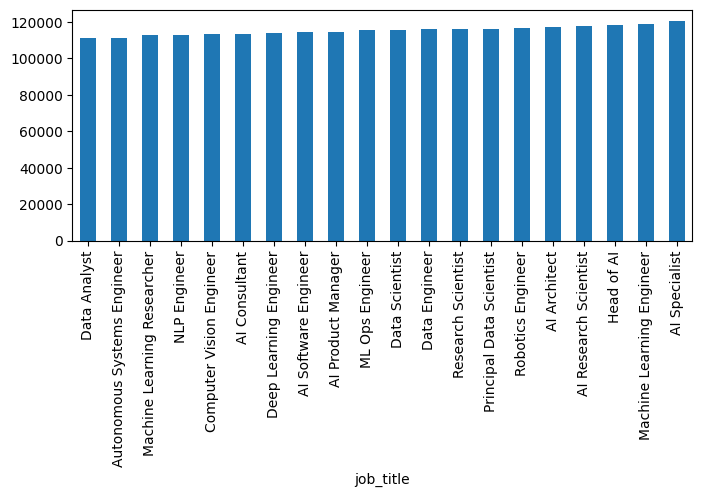

In [99]:

df.groupby('job_title')['salary_usd'].mean().sort_values().plot(kind='bar', figsize=(8,3))

<Axes: xlabel='experience_level'>

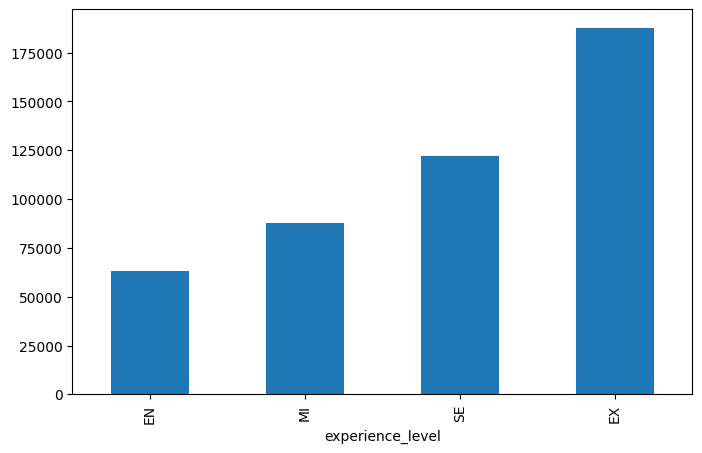

In [100]:
df.groupby('experience_level')['salary_usd'].mean().sort_values().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='education_required'>

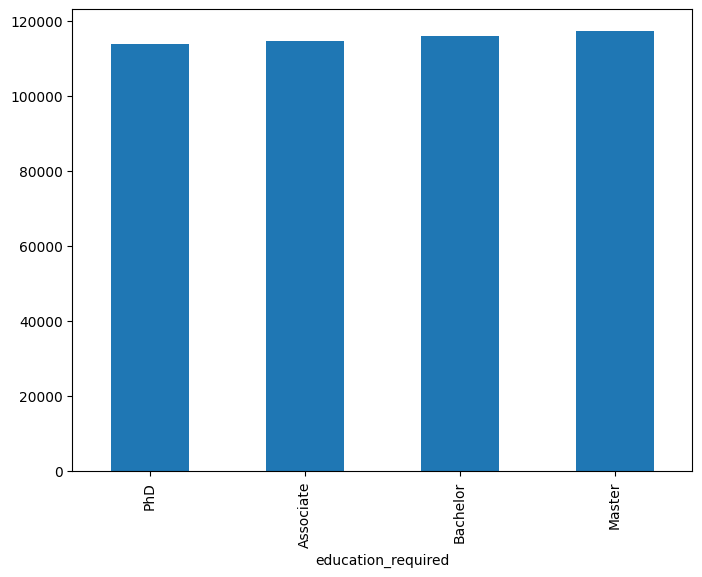

In [101]:
df.groupby('education_required')['salary_usd'].mean().sort_values().plot(kind='bar', figsize=(8, 6))

<Axes: xlabel='job_title'>

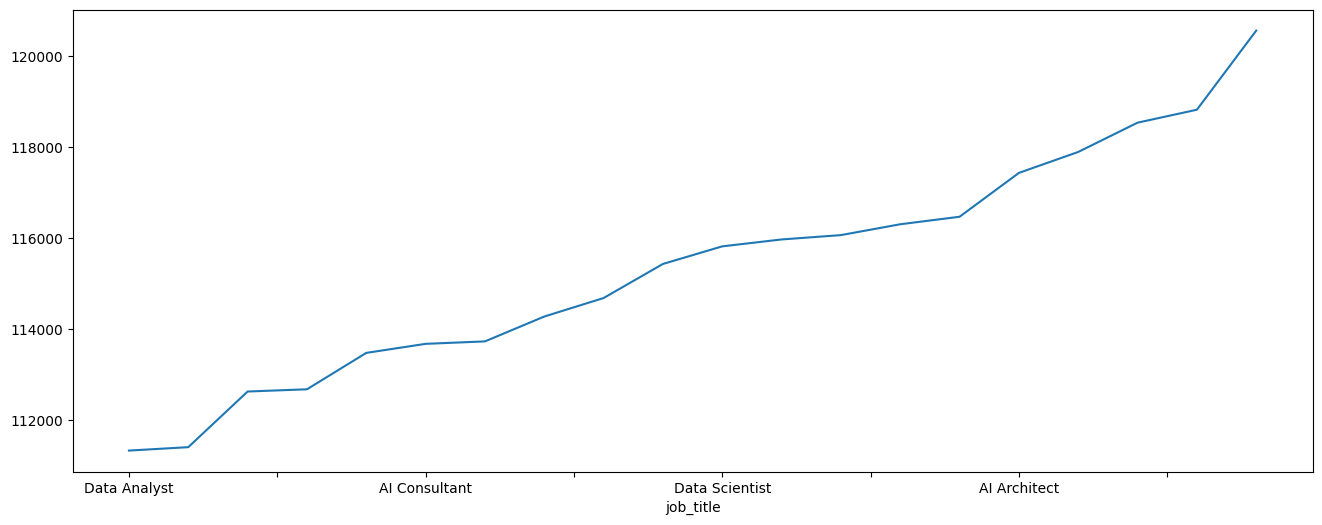

In [102]:
df.groupby('job_title')['salary_usd'].mean().sort_values().plot(kind='line', figsize=(16,6))

In [103]:

q1 = df["salary_usd"].quantile(0.25)
q3 = df["salary_usd"].quantile(0.75)
iqr = q3 - q1

outliers = df[(df["salary_usd"] < (q1 - 1.5 * iqr)) | (df["salary_usd"] > (q3 + 1.5 * iqr))]

In [104]:
print(':', len(outliers))

: 483


In [105]:

outliers.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score,salary_rank,salary_pct,prev_salary,next_salary,job_avg_salary,diff_from_job_avg
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,298760.908903,50.517598,14.397516,1493.068323,7.476190,241.308489,0.000423,185218.474120,182284.865424,115719.350788,183041.558114
std,30050.376811,40.030346,2.930621,575.988717,1.509593,139.204759,0.000043,55275.793523,56446.106235,2539.791328,30148.898715
min,261046.000000,0.000000,10.000000,500.000000,5.000000,1.000000,0.000370,88328.000000,86961.000000,111321.180501,141980.241758
25%,274715.000000,0.000000,12.000000,970.500000,6.000000,121.500000,0.000389,144951.500000,141164.000000,113671.870739,158891.747117
50%,290462.000000,50.000000,14.000000,1525.000000,7.500000,241.000000,0.000412,174304.000000,171629.000000,115970.720961,175034.486381
75%,318073.500000,100.000000,17.000000,1966.500000,8.800000,361.500000,0.000451,222584.500000,213520.500000,117897.925926,202346.788808
max,399095.000000,100.000000,19.000000,2497.000000,10.000000,482.000000,0.000565,361723.000000,390292.000000,120570.758242,286473.252475


In [106]:

df["salary_growth"] = df["salary_usd"].pct_change()

In [107]:
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,benefits_score,company_name,salary_rank,salary_pct,prev_salary,next_salary,job_avg_salary,diff_from_job_avg,same_country,salary_growth
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,...,5.9,Smart Analytics,2942.0,0.000198,NaN,80215.0,117897.925926,-27521.925926,True,NaN
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,...,5.2,TechCorp Inc,1708.0,0.000264,NaN,54624.0,114273.201531,-52378.201531,False,-0.315139
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,...,9.4,Autonomous Tech,68.0,0.000459,NaN,79670.0,120570.758242,32055.241758,False,1.465886
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,...,8.6,Future Systems,3356.0,0.000175,90376.0,123574.0,112670.937008,-32455.937008,True,-0.474434
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,...,6.6,Advanced Robotics,2239.0,0.000233,61895.0,70640.0,113671.870739,-59047.870739,False,-0.319030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,...,7.9,Advanced Robotics,3381.0,0.000164,63121.0,57811.0,116470.793149,-77866.793149,True,-0.709425
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,...,8.2,Smart Analytics,1987.0,0.000246,38604.0,79461.0,112621.747525,-54810.747525,True,0.497539
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,...,7.4,AI Innovations,1598.0,0.000268,132854.0,NaN,112670.937008,76819.062992,True,2.277750
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,...,5.6,Smart Analytics,701.0,0.000339,57811.0,NaN,118542.968627,-39081.968627,True,-0.580659


In [108]:

order = ['EN', 'MI', 'SE', 'EX']


mean_salaries = df.groupby("experience_level")["salary_usd"].mean().loc[order]


growth = mean_salaries.pct_change() * 100


growth_df = pd.DataFrame({
    "mean_salary": mean_salaries,
    "growth_percent": growth
})


In [109]:
growth_df

,mean_salary,growth_percent
experience_level,,
EN,63133.377084,NaN
MI,87955.471833,39.316913
SE,122187.657845,38.919905
EX,187723.647340,53.635523


In [110]:

df["salary_group"] = pd.qcut(df["salary_usd"], q=4, labels=["Low", "Medium", "High", "Top"])

In [111]:
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,company_name,salary_rank,salary_pct,prev_salary,next_salary,job_avg_salary,diff_from_job_avg,same_country,salary_growth,salary_group
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,...,Smart Analytics,2942.0,0.000198,NaN,80215.0,117897.925926,-27521.925926,True,NaN,Medium
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,...,TechCorp Inc,1708.0,0.000264,NaN,54624.0,114273.201531,-52378.201531,False,-0.315139,Low
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,...,Autonomous Tech,68.0,0.000459,NaN,79670.0,120570.758242,32055.241758,False,1.465886,Top
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,...,Future Systems,3356.0,0.000175,90376.0,123574.0,112670.937008,-32455.937008,True,-0.474434,Medium
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,...,Advanced Robotics,2239.0,0.000233,61895.0,70640.0,113671.870739,-59047.870739,False,-0.319030,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,...,Advanced Robotics,3381.0,0.000164,63121.0,57811.0,116470.793149,-77866.793149,True,-0.709425,Low
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,...,Smart Analytics,1987.0,0.000246,38604.0,79461.0,112621.747525,-54810.747525,True,0.497539,Low
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,...,AI Innovations,1598.0,0.000268,132854.0,NaN,112670.937008,76819.062992,True,2.277750,Top
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,...,Smart Analytics,701.0,0.000339,57811.0,NaN,118542.968627,-39081.968627,True,-0.580659,Medium
